## Normal and t Distributions

In [1]:
# libraries 
import numpy as np 
import scipy.stats as stats 
import matplotlib.pyplot as plt
import seaborn as sns
import pylab
%matplotlib inline
sns.set()


In [2]:
# creating normal distribution 
x = np.linspace(-5, 5, 1000) #create 1000 point from -5 to 5 
y = stats.norm.pdf(x) # create probability density for each point x  - normal distribution 
 
# creating Student t distributions for 2 sample sizes n =3 and n =15 
degree_freedom1 = 2 
t_dis1 = stats.t.pdf(x, degree_freedom1) 
 
degree_freedom2 = 15 
t_dis2 = stats.t.pdf(x, degree_freedom2) 

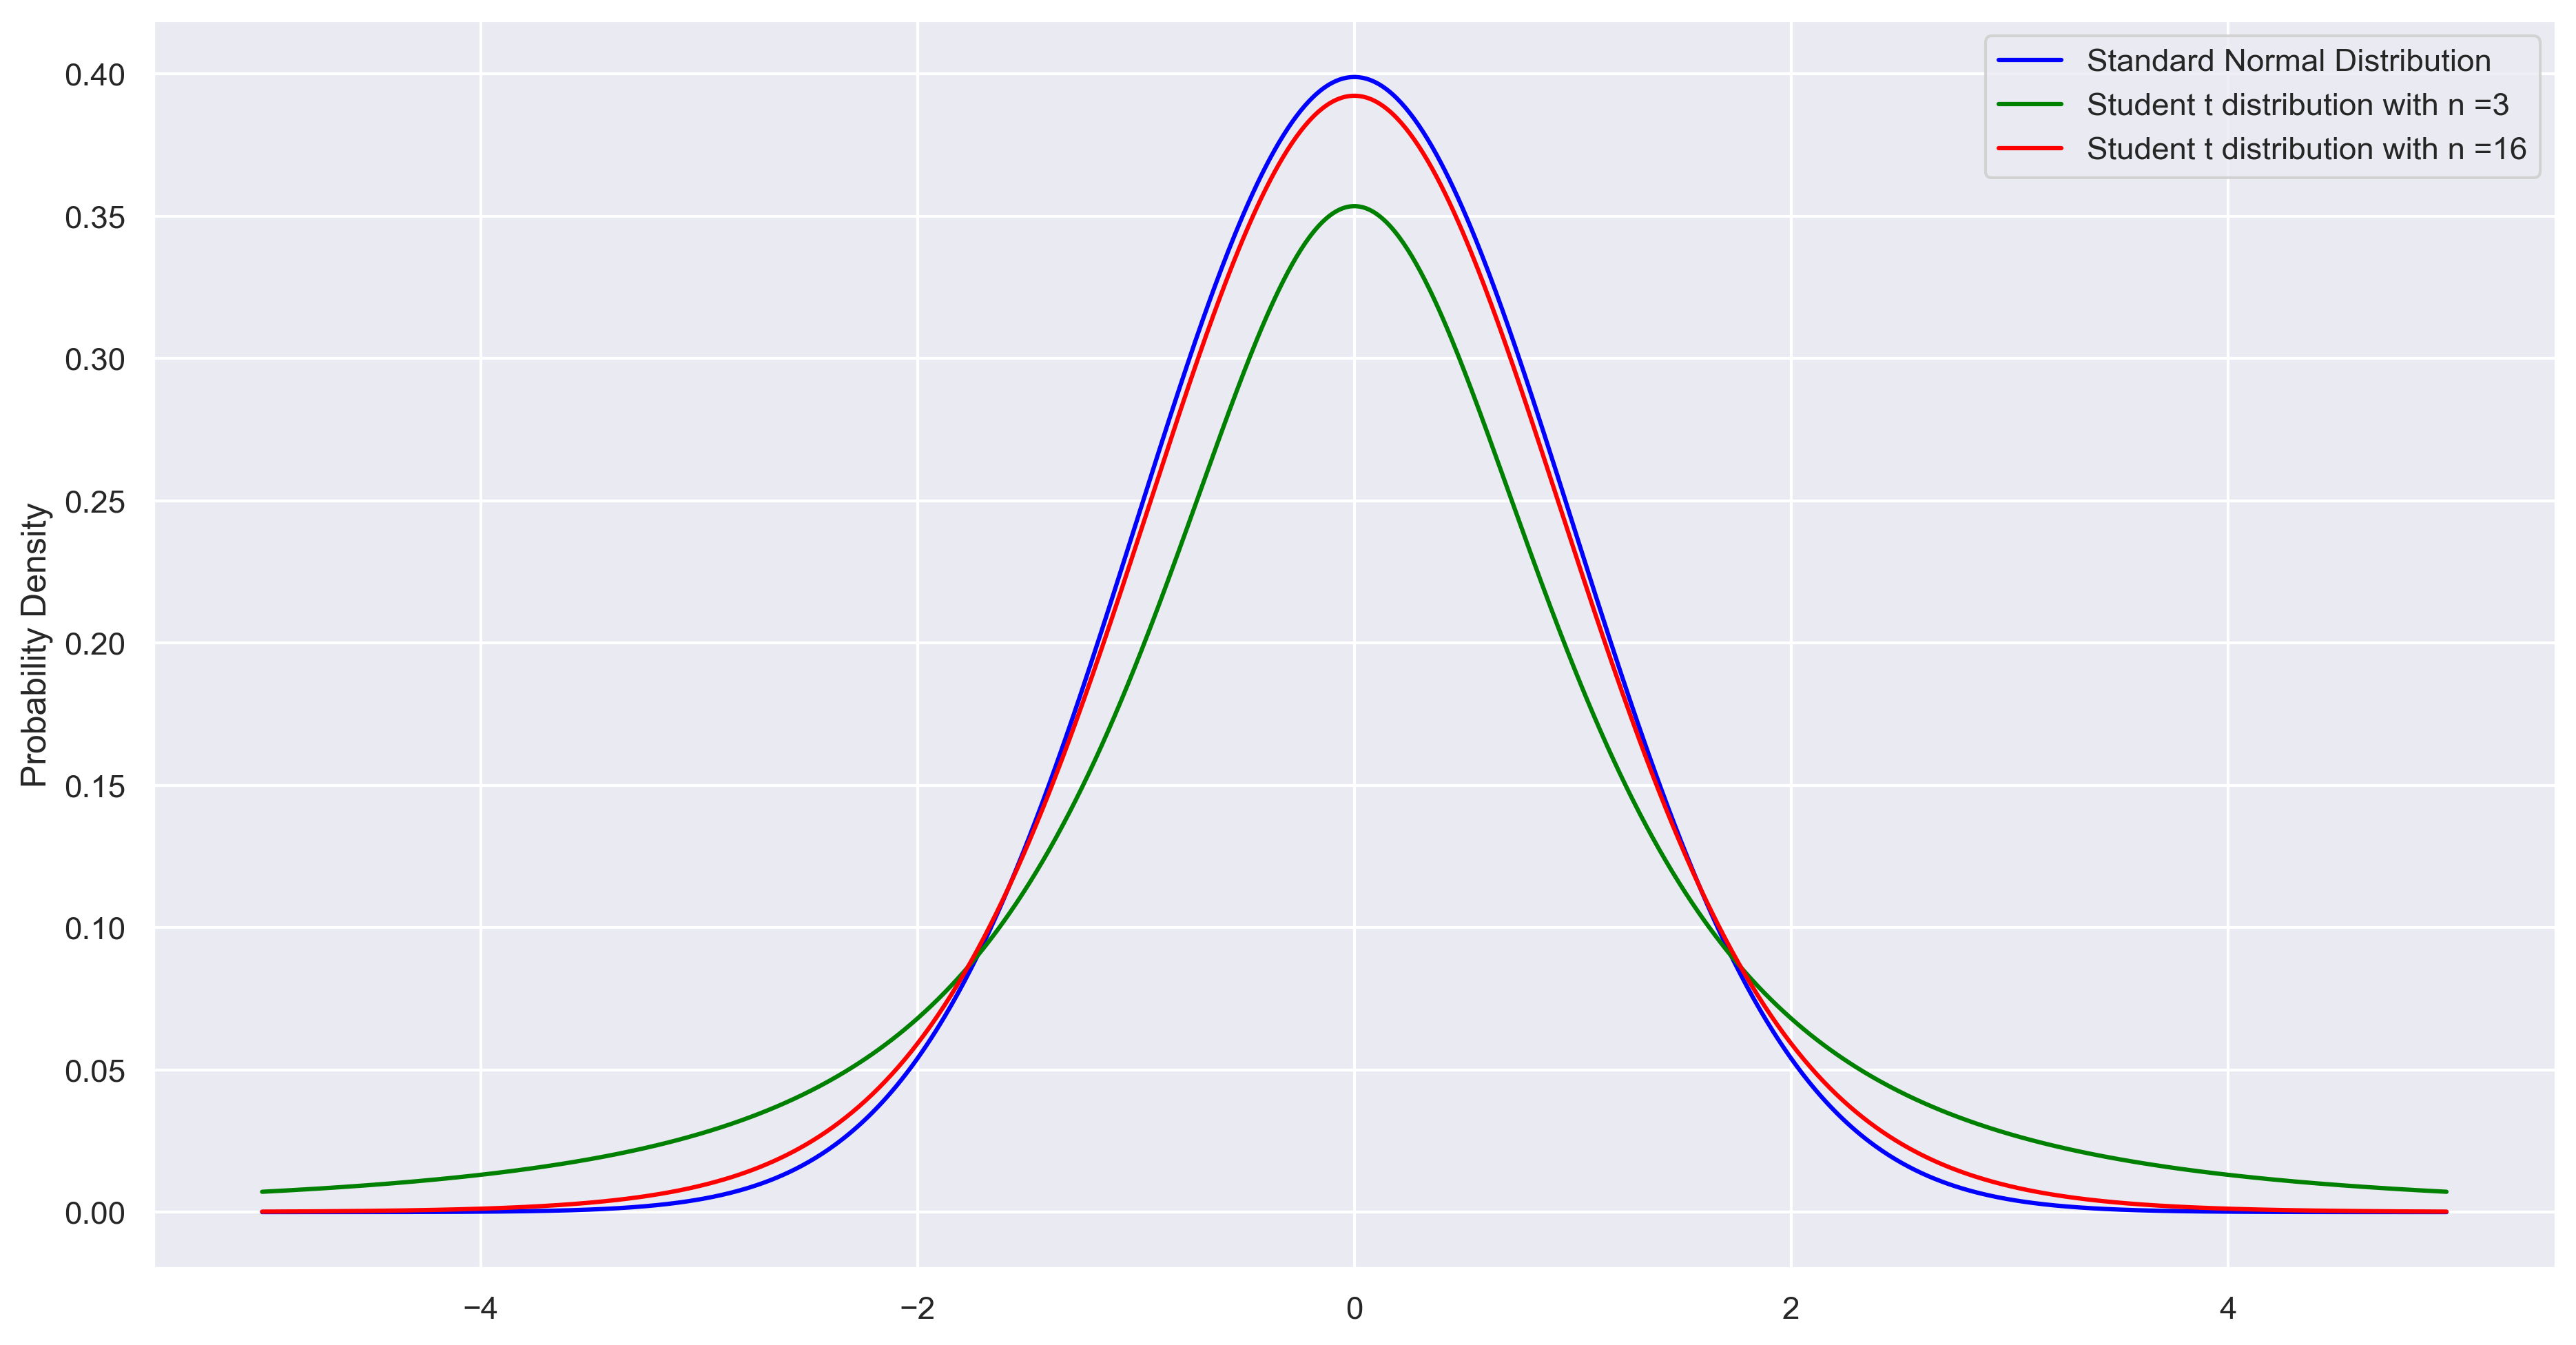

In [3]:
plt.figure(figsize=(15, 8), dpi=300)

# creating plots

plt.plot(x, y, color='blue', label="Standard Normal Distribution")
plt.plot(x, t_dis1, color='green', label=f"Student t distribution with n ={degree_freedom1+1}")
plt.plot(x, t_dis2, color='red', label=f"Student t distribution with n ={degree_freedom2+1}")
plt.ylabel('Probability Density')
#plt.xlabel('Standard Deviations')
plt.legend(loc= 'upper right')

plt.show()

## One-sample t-test

In [4]:

alpha = 0.05 # level of significance 
df= 15 # degree of freedom 
#find t critical value for left-tailed test 
print(f" The critical value is {stats.t.ppf(q= alpha, df =df)}") 
#find t critical value for right-tailed test 
print(f" The critical value is {stats.t.ppf(q= 1-alpha, df =df)}") 
##find t critical value for two-tailed test 
print(f" The critical values are {-stats.t.ppf(q= 1-alpha/2, df =df)} and {stats.t.ppf(q= 1-alpha/2, df =df)}") 

 The critical value is -1.7530503556925552
 The critical value is 1.7530503556925547
 The critical values are -2.131449545559323 and 2.131449545559323


In [5]:
# Example IQ scores

IQscores = [113, 107, 106, 115, 103, 103, 107, 102, 108, 107,
            104, 104, 99, 102, 102, 105, 109,  97, 109, 103,
            103,  100,  97, 107,116, 117, 105, 107,104, 107]

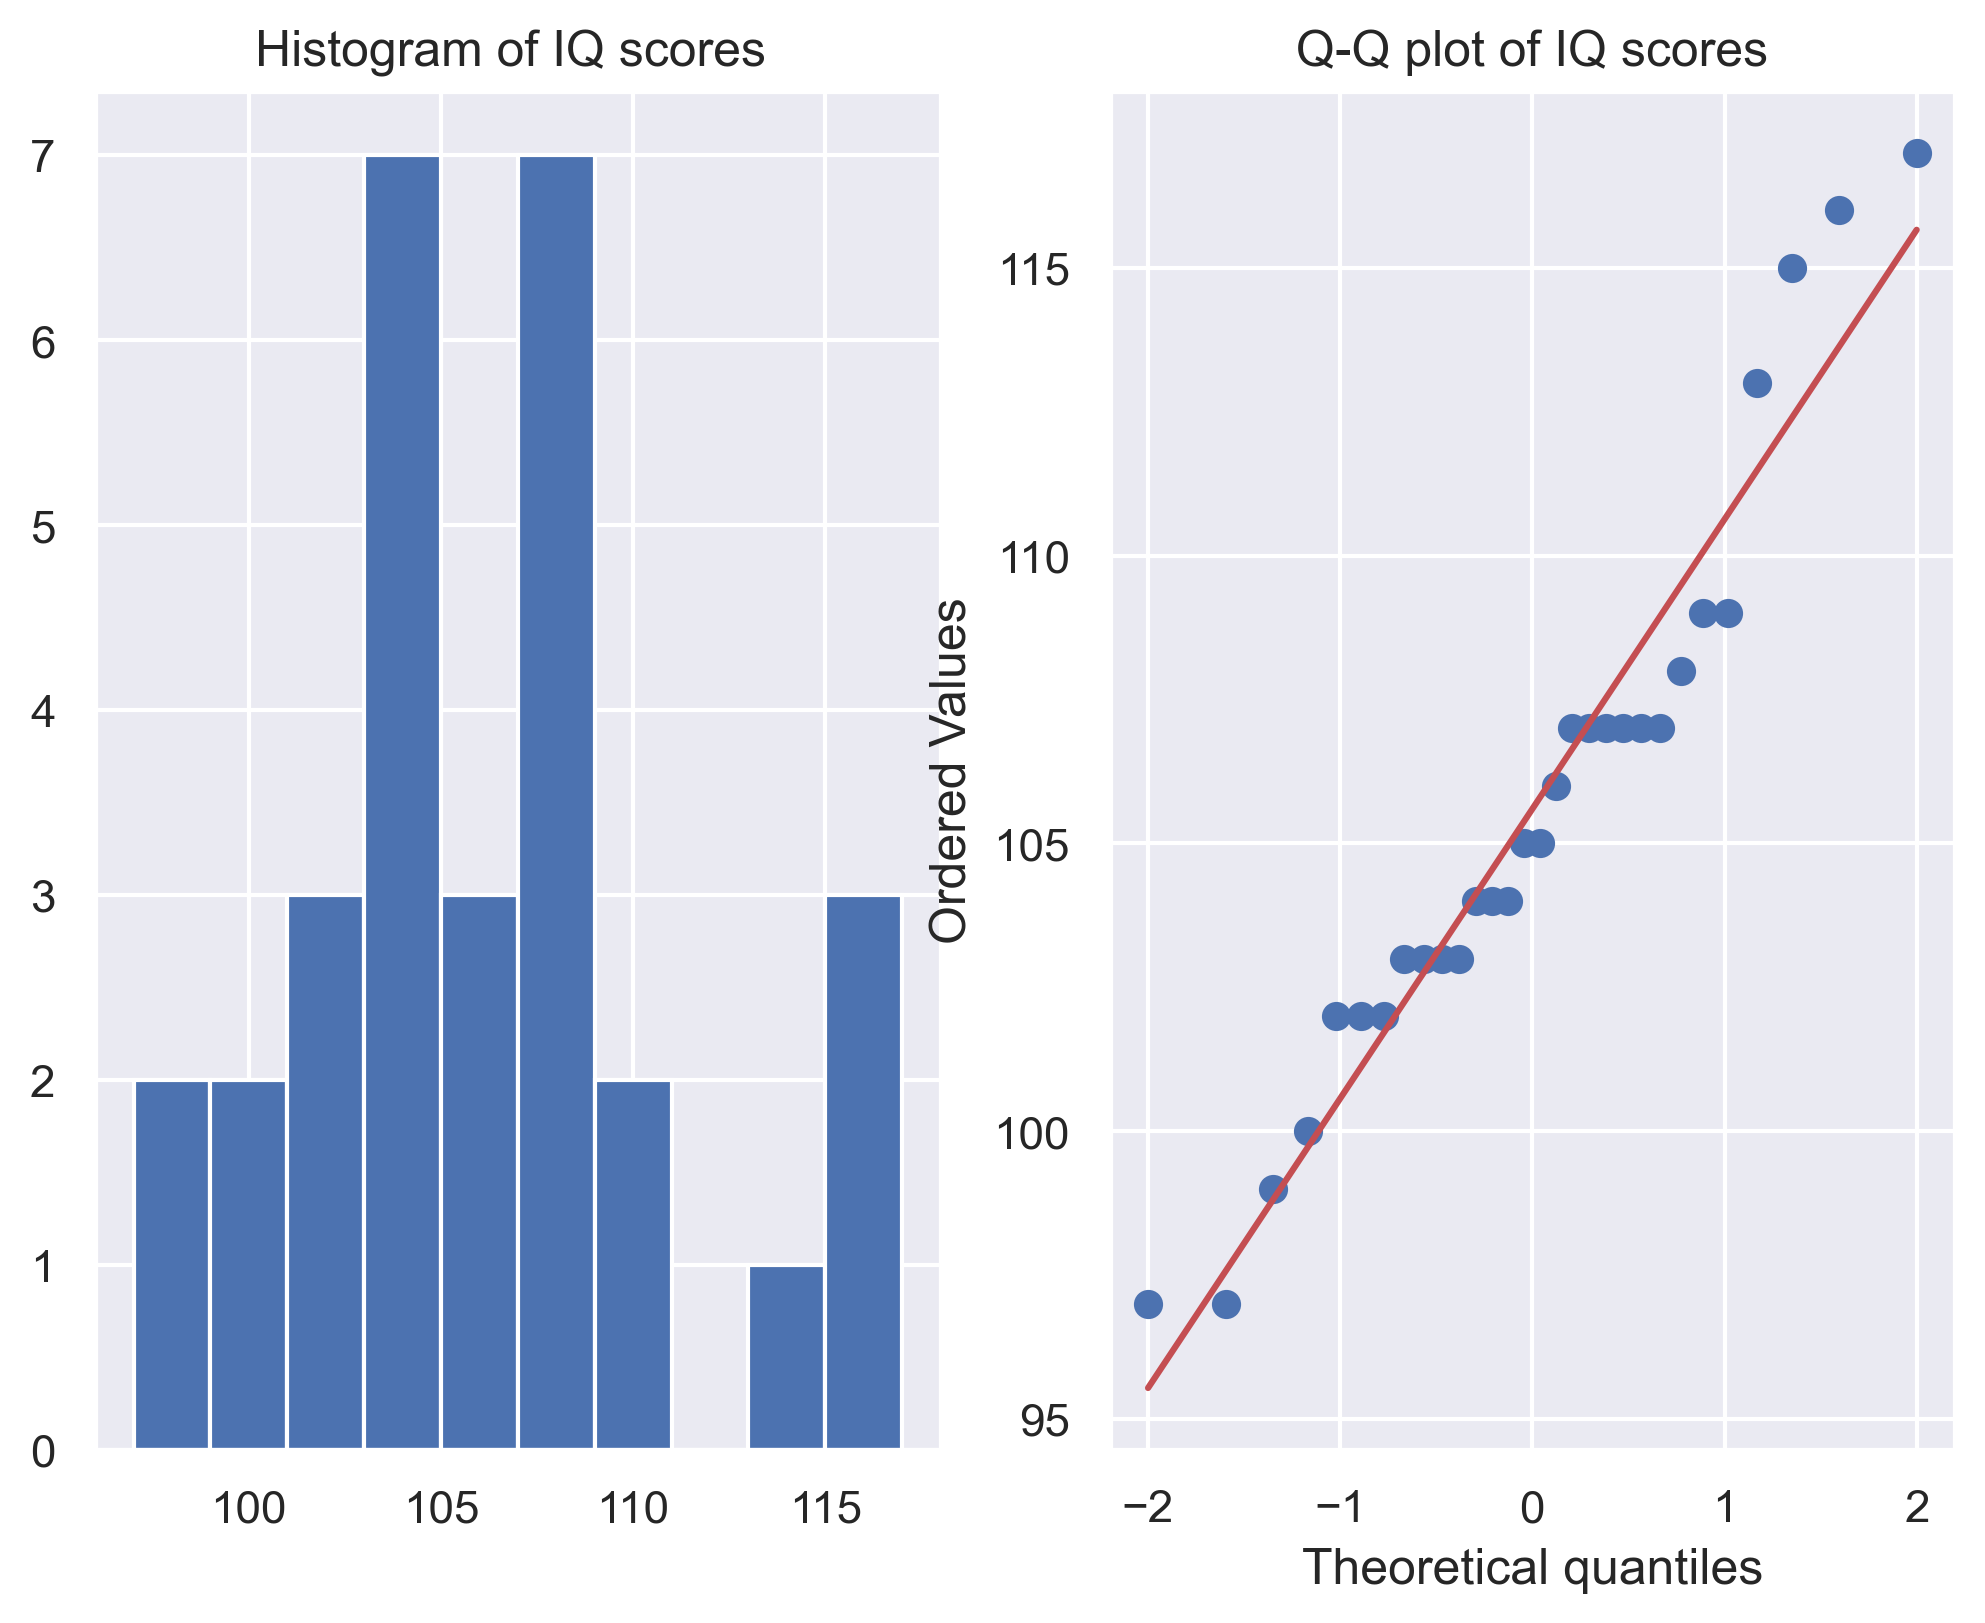

In [6]:

plt.figure(figsize=(8,6), dpi = 300)
plt.subplot(1,2,1)
plt.hist(IQscores)
plt.title('Histogram of IQ scores ')

plt.subplot(1,2,2)
stats.probplot(np.array(IQscores), dist="norm", plot=pylab)
plt.title('Q-Q plot of IQ scores')
pylab.show()
plt.show()

In [7]:
#perform one sample t-test 
t_statistic, p_value = stats.ttest_1samp(IQscores, popmean =100, axis=0,  alternative='greater') 
print(f"The test statistic is {t_statistic} and the corresponding p-value is {p_value}.") 

The test statistic is 6.159178830896832 and the corresponding p-value is 5.15076734562176e-07.


In [8]:
IQmean = np.array(IQscores).mean() # sample mean 
IQsd = np.array(IQscores).std() # sample standard deviation 
sample_size = len(np.array(IQscores)) # sample size 
df = sample_size-1 # degree of freedom 
alpha = 0.05 # level of significance 
t_crit = stats.t.ppf(q=1-alpha, df =df) # critical  
confidence_interval = (IQmean-IQsd*t_crit/np.sqrt(sample_size), IQmean+IQsd*t_crit/np.sqrt(sample_size)) 
confidence_interval

(104.0810991241721, 107.11890087582789)

## Two-sample t-test: Pooled t-test 

In [9]:
# Let us look at the IQ scores between 2 high schools, A and B.

IQscoresA = [113, 107, 106, 115, 103, 103, 107, 102, 108, 107,  
            104, 104, 99, 102, 102, 105, 109,  97, 109, 103, 
            103,  100,  97, 107,116, 117, 105, 107,104, 107] 
 
IQscoresB = [102, 108, 110, 101, 98, 98, 97,102, 102, 103,  
             100, 99, 97,97, 94, 100, 104,  98, 92, 104, 
            98,  95,  92, 111,102, 112, 100, 103,103, 100] 

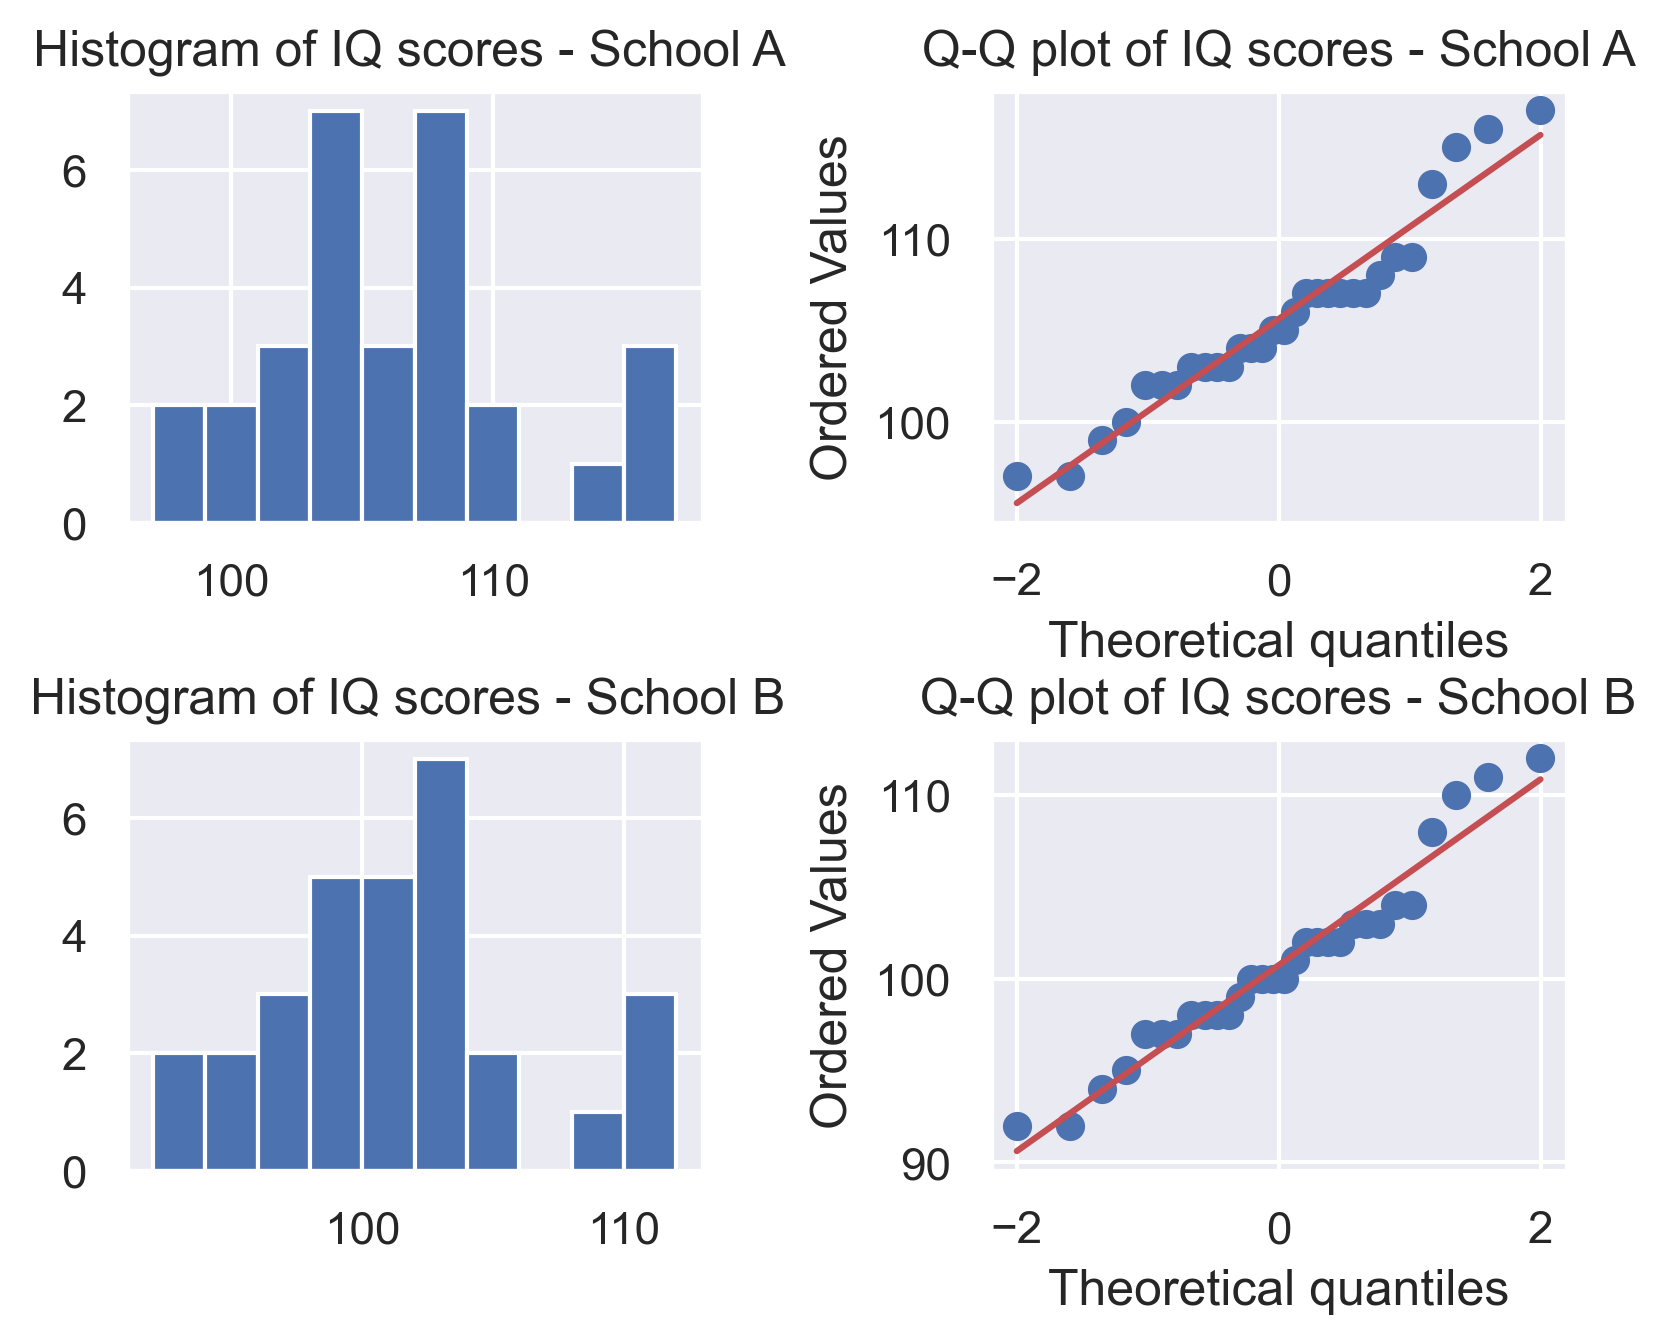

In [10]:
plt.figure(figsize=(8,6), dpi = 300)
plt.subplot(2,2,1)
plt.hist(IQscoresA)
plt.title('Histogram of IQ scores - School A ')

plt.subplot(2,2,2)
stats.probplot(np.array(IQscoresA), dist="norm", plot=pylab)
plt.title('Q-Q plot of IQ scores - School A')


plt.subplot(2,2,3)
plt.hist(IQscoresB)
plt.title('Histogram of IQ scores - School B ')

plt.subplot(2,2,4)
stats.probplot(np.array(IQscoresB), dist="norm", plot=pylab)
plt.title('Q-Q plot of IQ scores - School B')

# set the spacing between subplots
plt.subplots_adjust(left=0.2,
                    bottom=0.2,
                    right=0.8,
                    top=0.8,
                    wspace=0.5,
                    hspace=0.5)
pylab.show()
plt.show()

In [12]:
# F-test 

IQscoresA = np.array(IQscoresA) 
IQscoresB = np.array(IQscoresB) 
f = np.var(IQscoresA, ddof=1)/np.var(IQscoresB, ddof=1) # F statistic 
dfA = IQscoresA.size-1 #degrees of freedom A 
dfB = IQscoresB.size-1 #degrees of freedom B  
p = 1-stats.f.cdf(f, dfA, dfB) #p-value  

In [14]:
from statsmodels.stats.weightstats import ttest_ind as ttest 
t_statistic, p_value, degree_freedom = ttest(IQscoresA, IQscoresB, alternative='two-sided', usevar='pooled') 

## Two-sample t-test: Welch’s t-test  

In [16]:
sample1 = np.array([2,3,4,2,3,4,2,3,5,8,7,10]) 
sample2 = np.array([30,26,32,34,28,29,31,35,36,33,32,27]) 

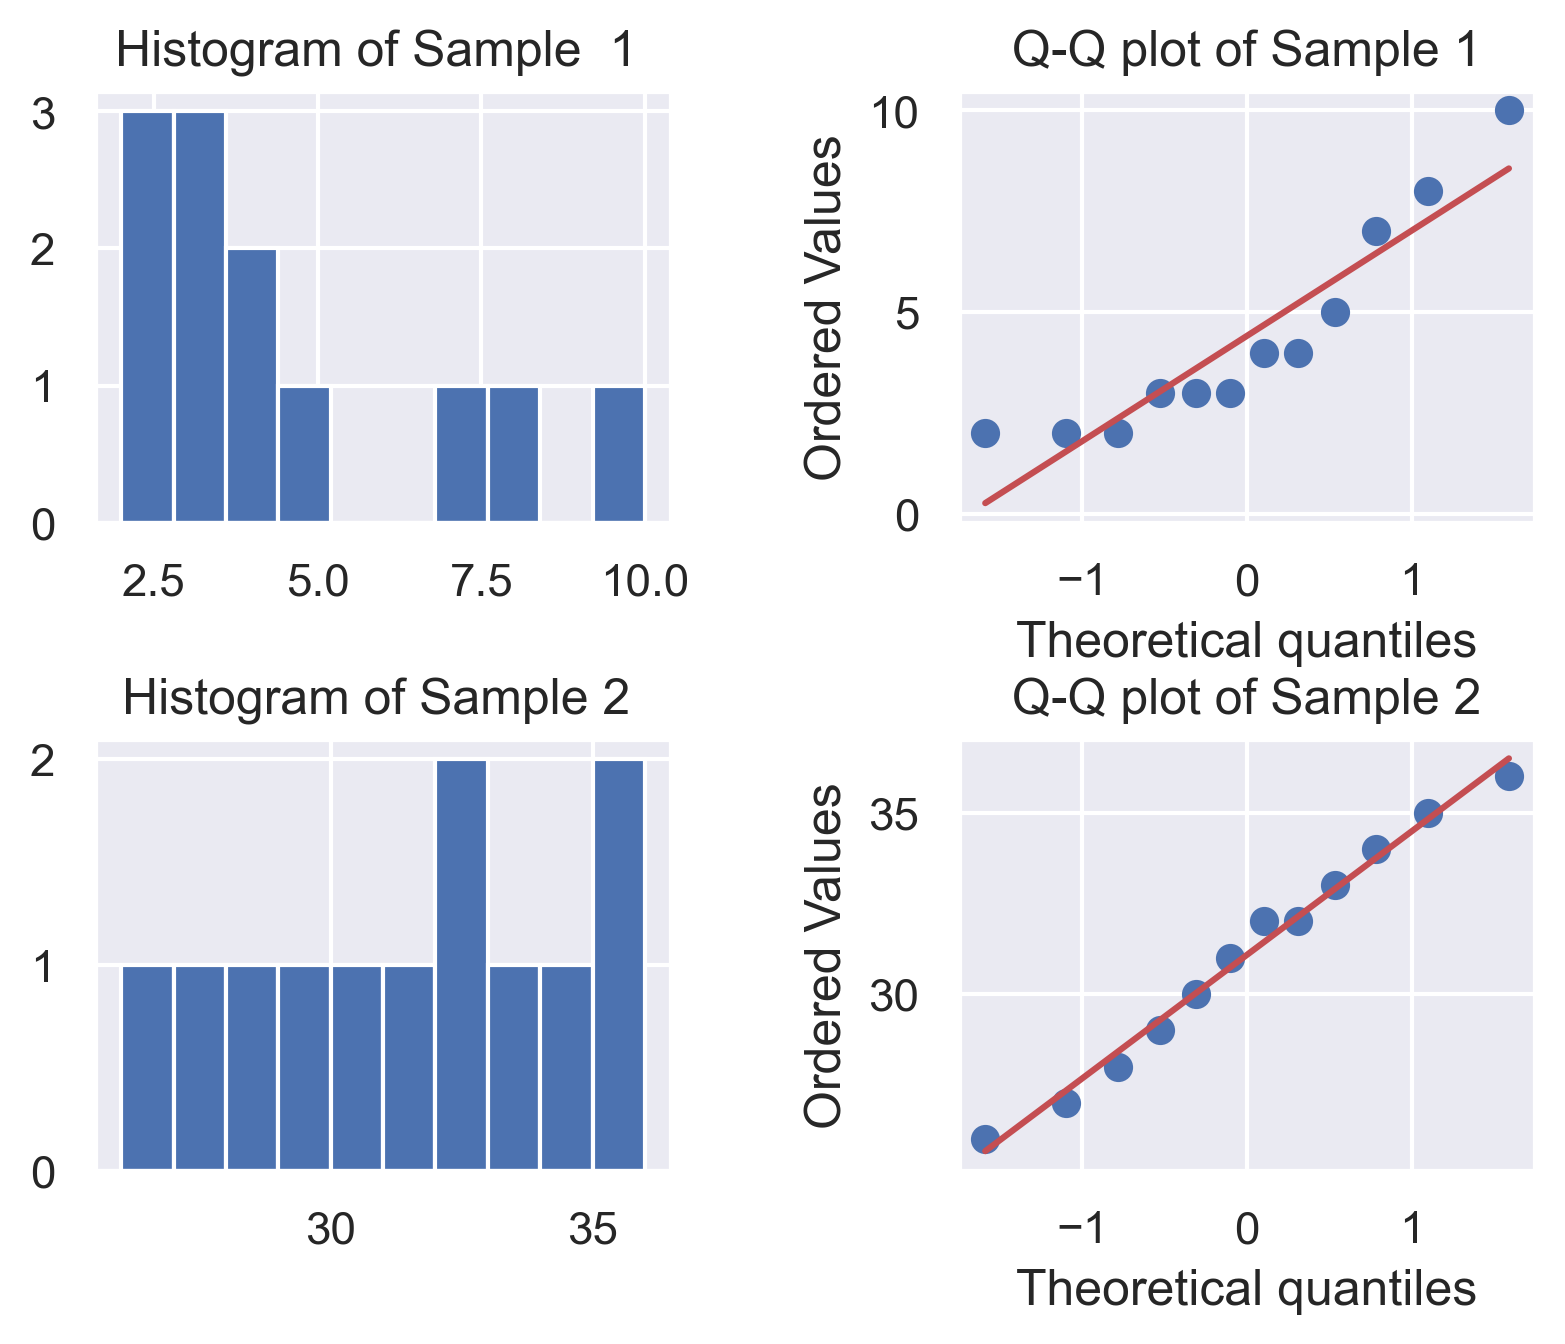

In [17]:
plt.figure(figsize=(8,6), dpi = 300)
plt.subplot(2,2,1)
plt.hist(sample1)
plt.title('Histogram of Sample  1 ')

plt.subplot(2,2,2)
stats.probplot(np.array(sample1), dist="norm", plot=pylab)
plt.title('Q-Q plot of Sample 1')


plt.subplot(2,2,3)
plt.hist(sample2)
plt.title('Histogram of Sample 2 ')

plt.subplot(2,2,4)
stats.probplot(np.array(sample2), dist="norm", plot=pylab)
plt.title('Q-Q plot of Sample 2')

# set the spacing between subplots
plt.subplots_adjust(left=0.2,
                    bottom=0.2,
                    right=0.8,
                    top=0.8,
                    wspace=0.5,
                    hspace=0.5)
pylab.show()
plt.show()

In [18]:
t_statistic, p_value = stats.ttest_ind(sample1, sample2, equal_var = False) 

## Paired t-test 

In [20]:
IQ_pre = [95, 98, 90, 115, 112]
IQ_pos = [95, 110, 97, 112, 117]

t_statistic, p_value = stats.ttest_rel(IQ_pos, IQ_pre, alternative = 'greater')
t_statistic, p_value

(1.5942981978023594, 0.09304750972072405)

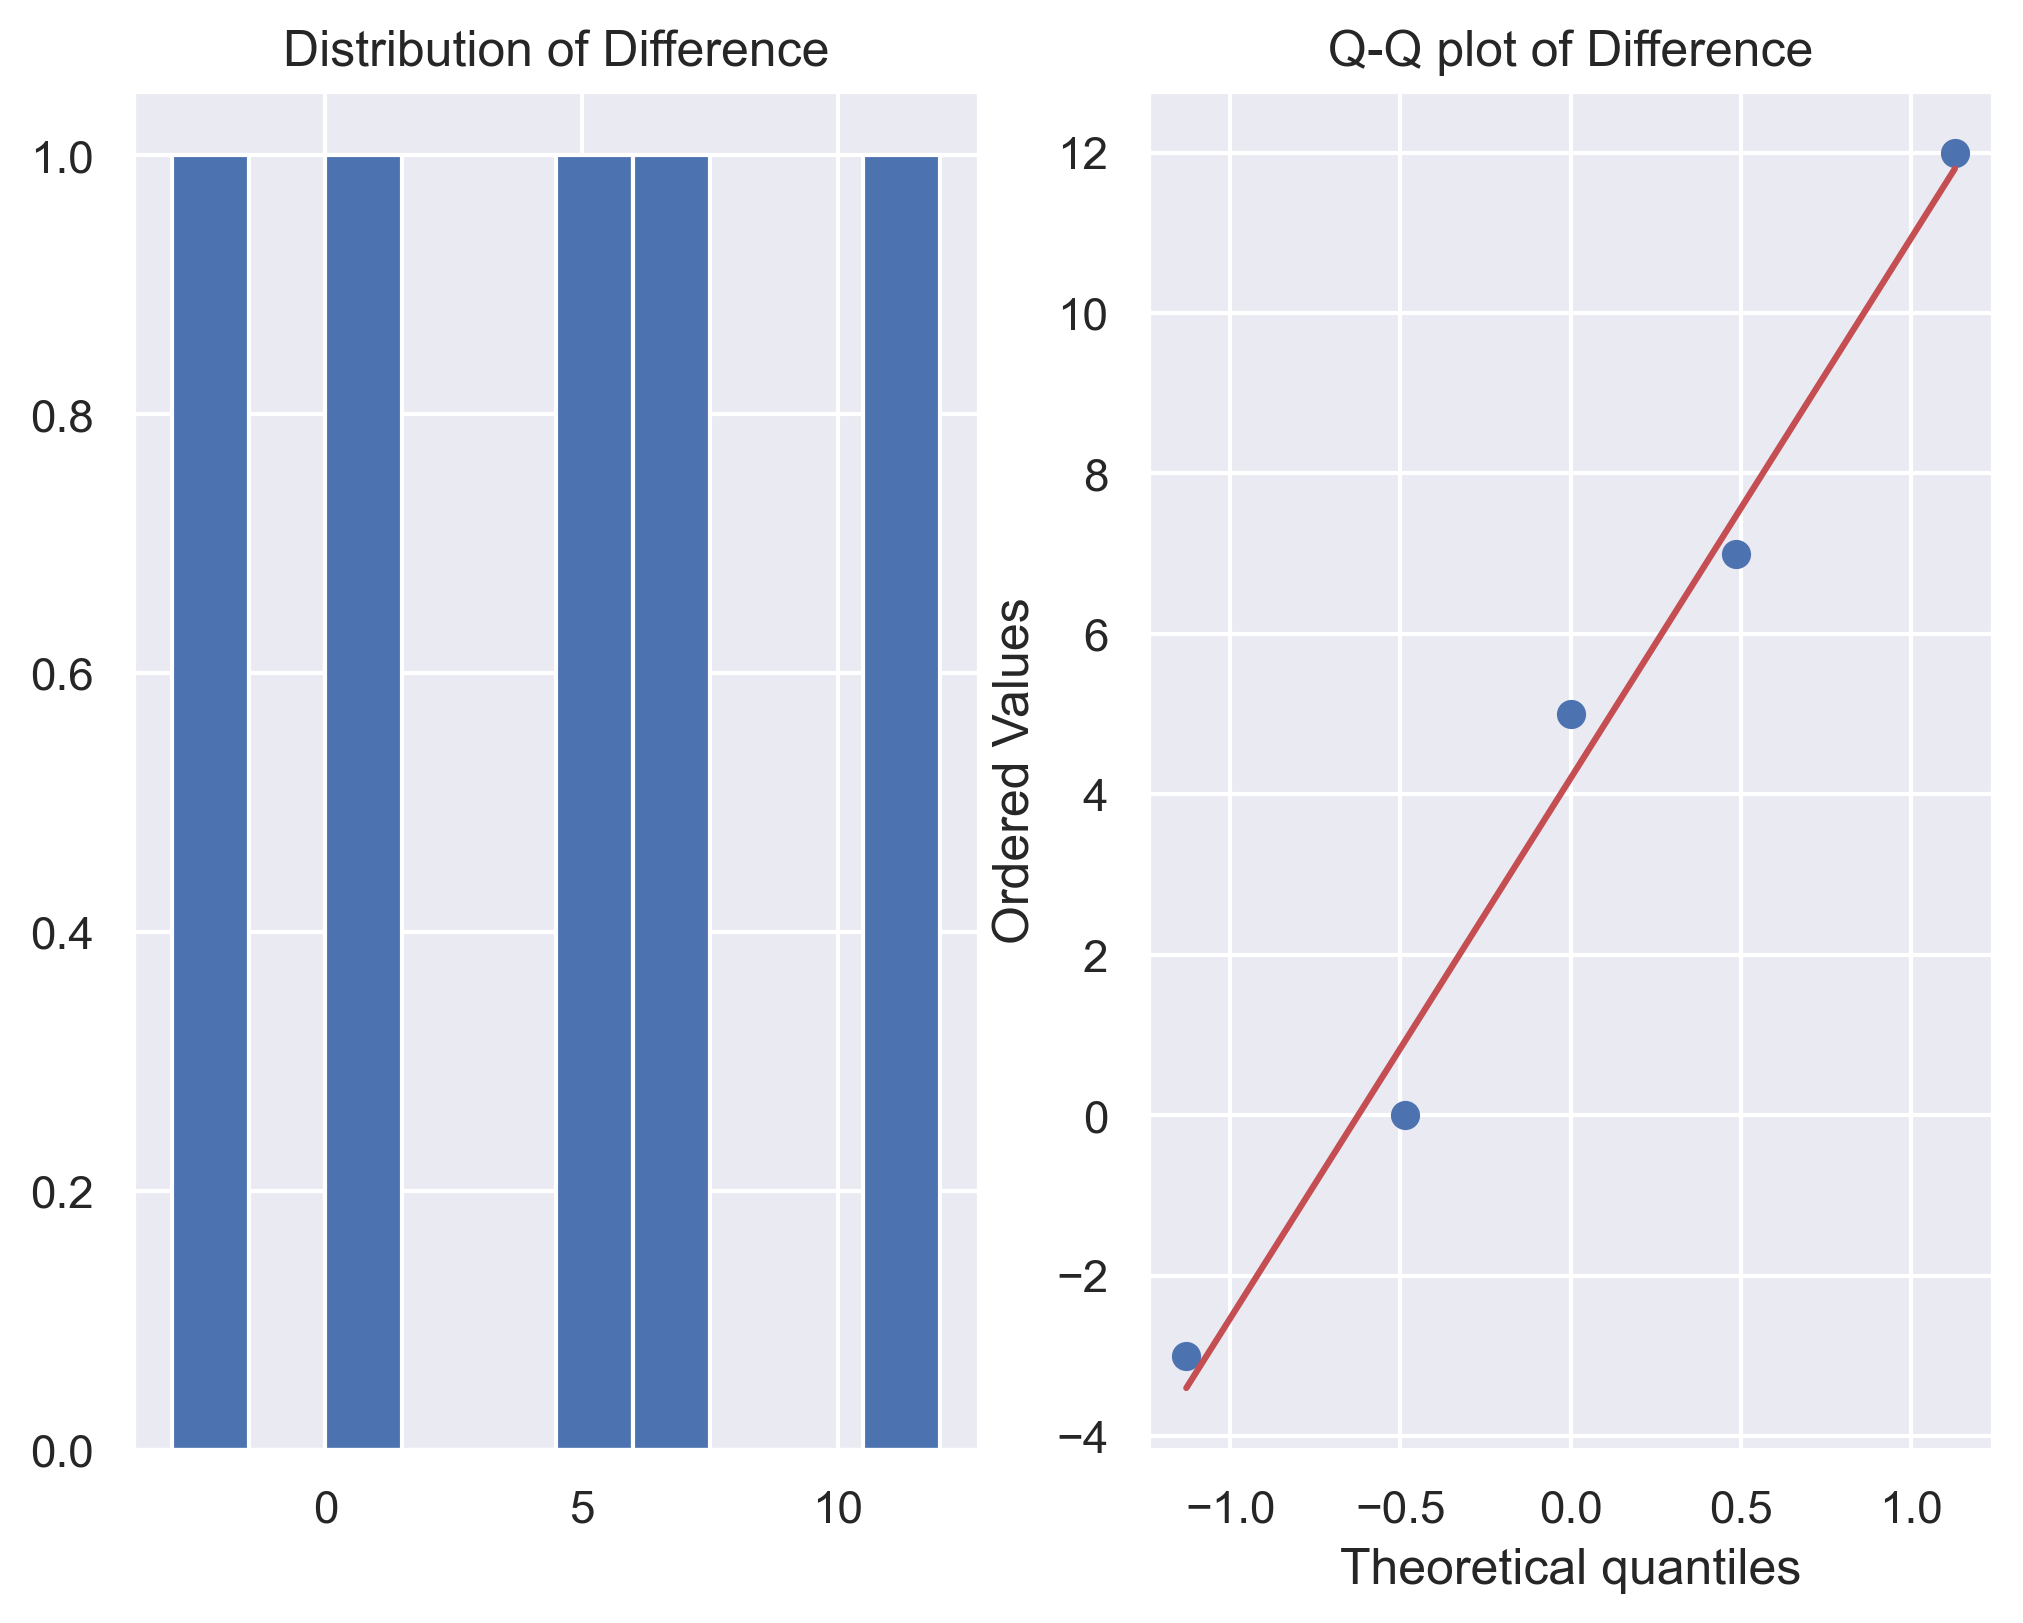

In [21]:
differences = [0, 12, 7,-3,5]


plt.figure(figsize=(8,6), dpi = 300)
plt.subplot(1,2,1)
plt.hist(differences)
plt.title('Distribution of Difference')

plt.subplot(1,2,2)
stats.probplot(np.array(differences), dist="norm", plot=pylab)
plt.title('Q-Q plot of Difference')

plt.show()